# Neural Network

###### Basic setup

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import h5py
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import optimizers, regularizers
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Part FOUR

##### Import and load data

In [54]:
imgfile = h5py.File('/content/gdrive/MyDrive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [55]:
# data loading
def load_h5(dataset):
  temp=imgfile.get(dataset)
  variable =np.array(temp)
  return variable

X_test = load_h5('X_test')
X_train = load_h5('X_train')
X_val = load_h5('X_val')
y_test = load_h5('y_test')
y_train = load_h5('y_train')
y_val = load_h5('y_val')


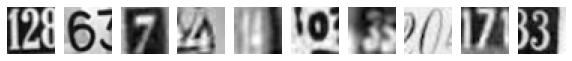

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [56]:
#Visualise Data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [57]:
## Data shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


#### One-hot encoding the class vector
###### converting y_train and y_test each in 10 classes

In [58]:
from tensorflow.keras.utils import to_categorical

print("Value before encoding:", y_train[0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("y_train shape:", y_train.shape)
print(" y_train One hot encoded value:", y_train[0])

Value before encoding: 2
y_train shape: (42000, 10)
 y_train One hot encoded value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Creating the model

In [59]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [60]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)               

In [61]:
#Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size = 32,verbose=1)

Epoch 1/50
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2954 - accuracy: 0.1299 - val_loss: 1.8641 - val_accuracy: 0.3434
Epoch 2/50
1313/1313 [==============================] - 10s 7ms/step - loss: 1.9264 - accuracy: 0.2888 - val_loss: 1.4837 - val_accuracy: 0.4857
Epoch 3/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.6315 - accuracy: 0.4238 - val_loss: 1.1676 - val_accuracy: 0.6264
Epoch 4/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.4246 - accuracy: 0.5180 - val_loss: 1.0004 - val_accuracy: 0.6988
Epoch 5/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.2895 - accuracy: 0.5772 - val_loss: 0.9324 - val_accuracy: 0.7106
Epoch 6/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.1838 - accuracy: 0.6154 - val_loss: 0.8445 - val_accuracy: 0.7519
Epoch 7/50
1313/1313 [==============================] - 9s 7ms/step - loss: 1.1062 - accuracy: 0.6466 - val_loss: 0.7905 - val_accuracy

### Model Evaluation

In [62]:
#Evaluate the model
y_val = to_categorical(y_val, num_classes=10)
model.evaluate(X_val, y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8803


[0.4160851538181305, 0.880299985408783]

### Model Graphs

In [63]:
# Get training and test losses & accuracies
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


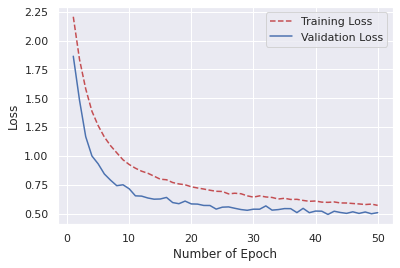

In [64]:
# Visualizing loss history vs Epoch count
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.show();

Loss Vs Epoch graph shows how both training and validation loss drop with epoch count and then normalises. The curve shows good learning rate for both losses. 

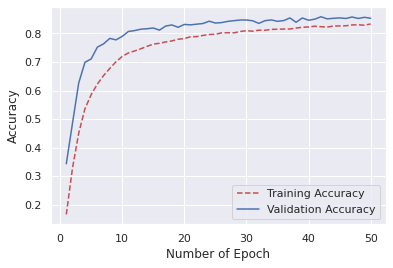

In [65]:
# Visualize accuracy history vs Epoch count
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.show();

Accuracy Vs Epoch graph shows how both training and validation accuracy rises with epoch count and then normalises. The curve shows good learning rate for both accuracies and seems like an inverse of loss graph

# Part ONE

### Import and load data

In [4]:
# importing the file into a dataframe and displaying the rows
signal = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Signal.csv')
signal.head()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

### Basic EDA 

In [5]:
#checking for null/NA values and printing info
print("Count of null values=",signal.isna().sum().sum())
print(signal.info());

Count of null values= 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
### Adding the central values,skewness, standard deviation and quartiles in a dataframe
describedf=signal.describe().T
describedf['range']=describedf['max']-describedf['min']
describedf.drop(columns='count', inplace=True)
describedf['median']=signal.median()
describedf['skewness']=signal.skew()
describedf

mean        std      min  ...      range    median  skewness
Parameter 1       8.319637   1.741096  4.60000  ...   11.30000   7.90000  0.982751
Parameter 2       0.527821   0.179060  0.12000  ...    1.46000   0.52000  0.671593
Parameter 3       0.270976   0.194801  0.00000  ...    1.00000   0.26000  0.318337
Parameter 4       2.538806   1.409928  0.90000  ...   14.60000   2.20000  4.540655
Parameter 5       0.087467   0.047065  0.01200  ...    0.59900   0.07900  5.680347
Parameter 6      15.874922  10.460157  1.00000  ...   71.00000  14.00000  1.250567
Parameter 7      46.467792  32.895324  6.00000  ...  283.00000  38.00000  1.515531
Parameter 8       0.996747   0.001887  0.99007  ...    0.01362   0.99675  0.071288
Parameter 9       3.311113   0.154386  2.74000  ...    1.27000   3.31000  0.193683
Parameter 10      0.658149   0.169507  0.33000  ...    1.67000   0.62000  2.428672
Parameter 11     10.422983   1.065668  8.40000  ...    6.50000  10.20000  0.860829
Signal_Strength   5.636023   0.807569  3.00000  ...    5.00000   6.00000  0.217802

[12 rows x 10 columns]

In [7]:
## replacing outliers with median values
for j in signal.columns[:-1]:
    Q1 = signal[j].quantile(0.25)
    Q3 = signal[j].quantile(0.75)
    IQR = Q3 - Q1
    signal.loc[(signal[j] < (Q1 - (1.5*IQR))) | (signal[j] > (Q3 + (1.5*IQR))),j] = signal[j].median()

### Uni, bi and multivariate analysis

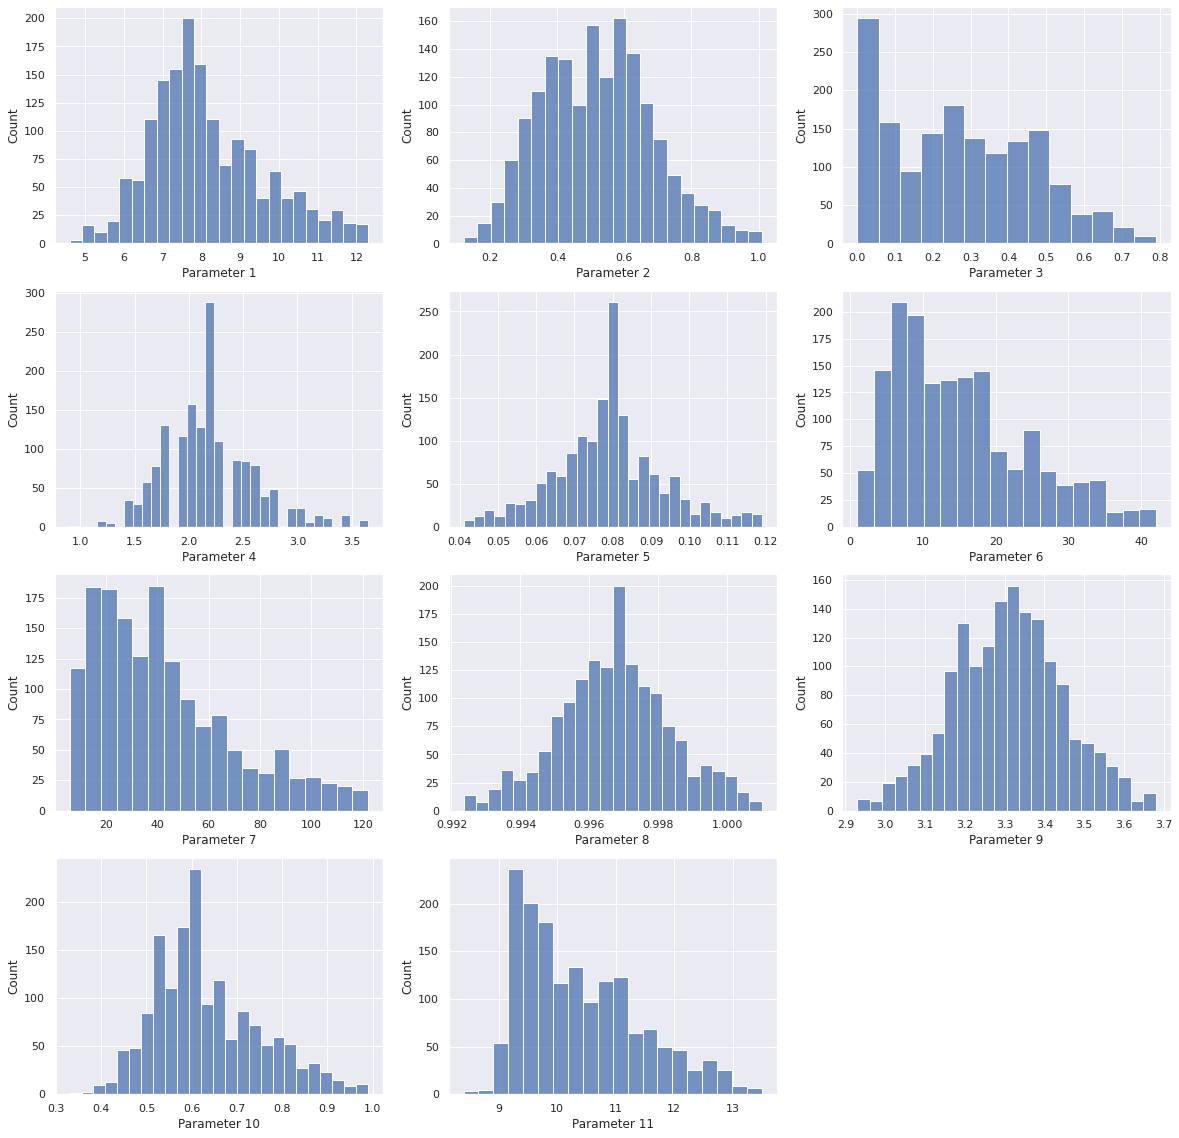

In [8]:
#Univariate analysis of predictor columns
fig, axs = plt.subplots(nrows=4, ncols = 3, figsize=(20,20))
axs = axs.flatten()
for i in range(0,len(signal.columns)-1):
    sns.histplot(signal.iloc[:,i],ax=axs[i],kde=False)
fig.delaxes(axs[11])
plt.show()

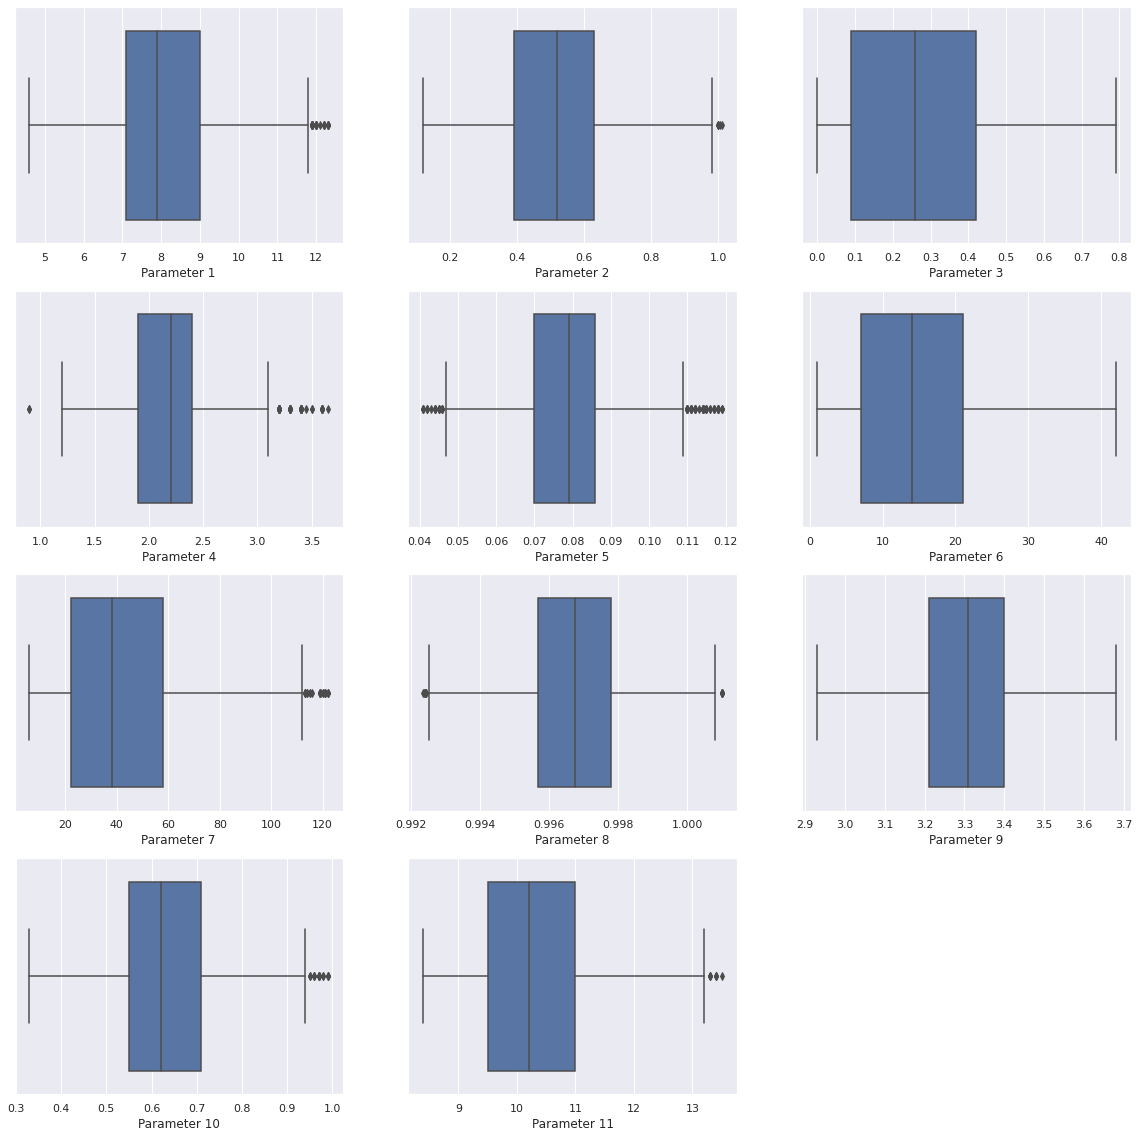

In [9]:
#Boxplots for outliers and central values
fig, axs = plt.subplots(nrows=4, ncols = 3, figsize=(20,20))
axs = axs.flatten()
for i in range(0,len(signal.columns)-1):
    sns.boxplot(x=signal.iloc[:,i],ax=axs[i]);
fig.delaxes(axs[11])
plt.show()

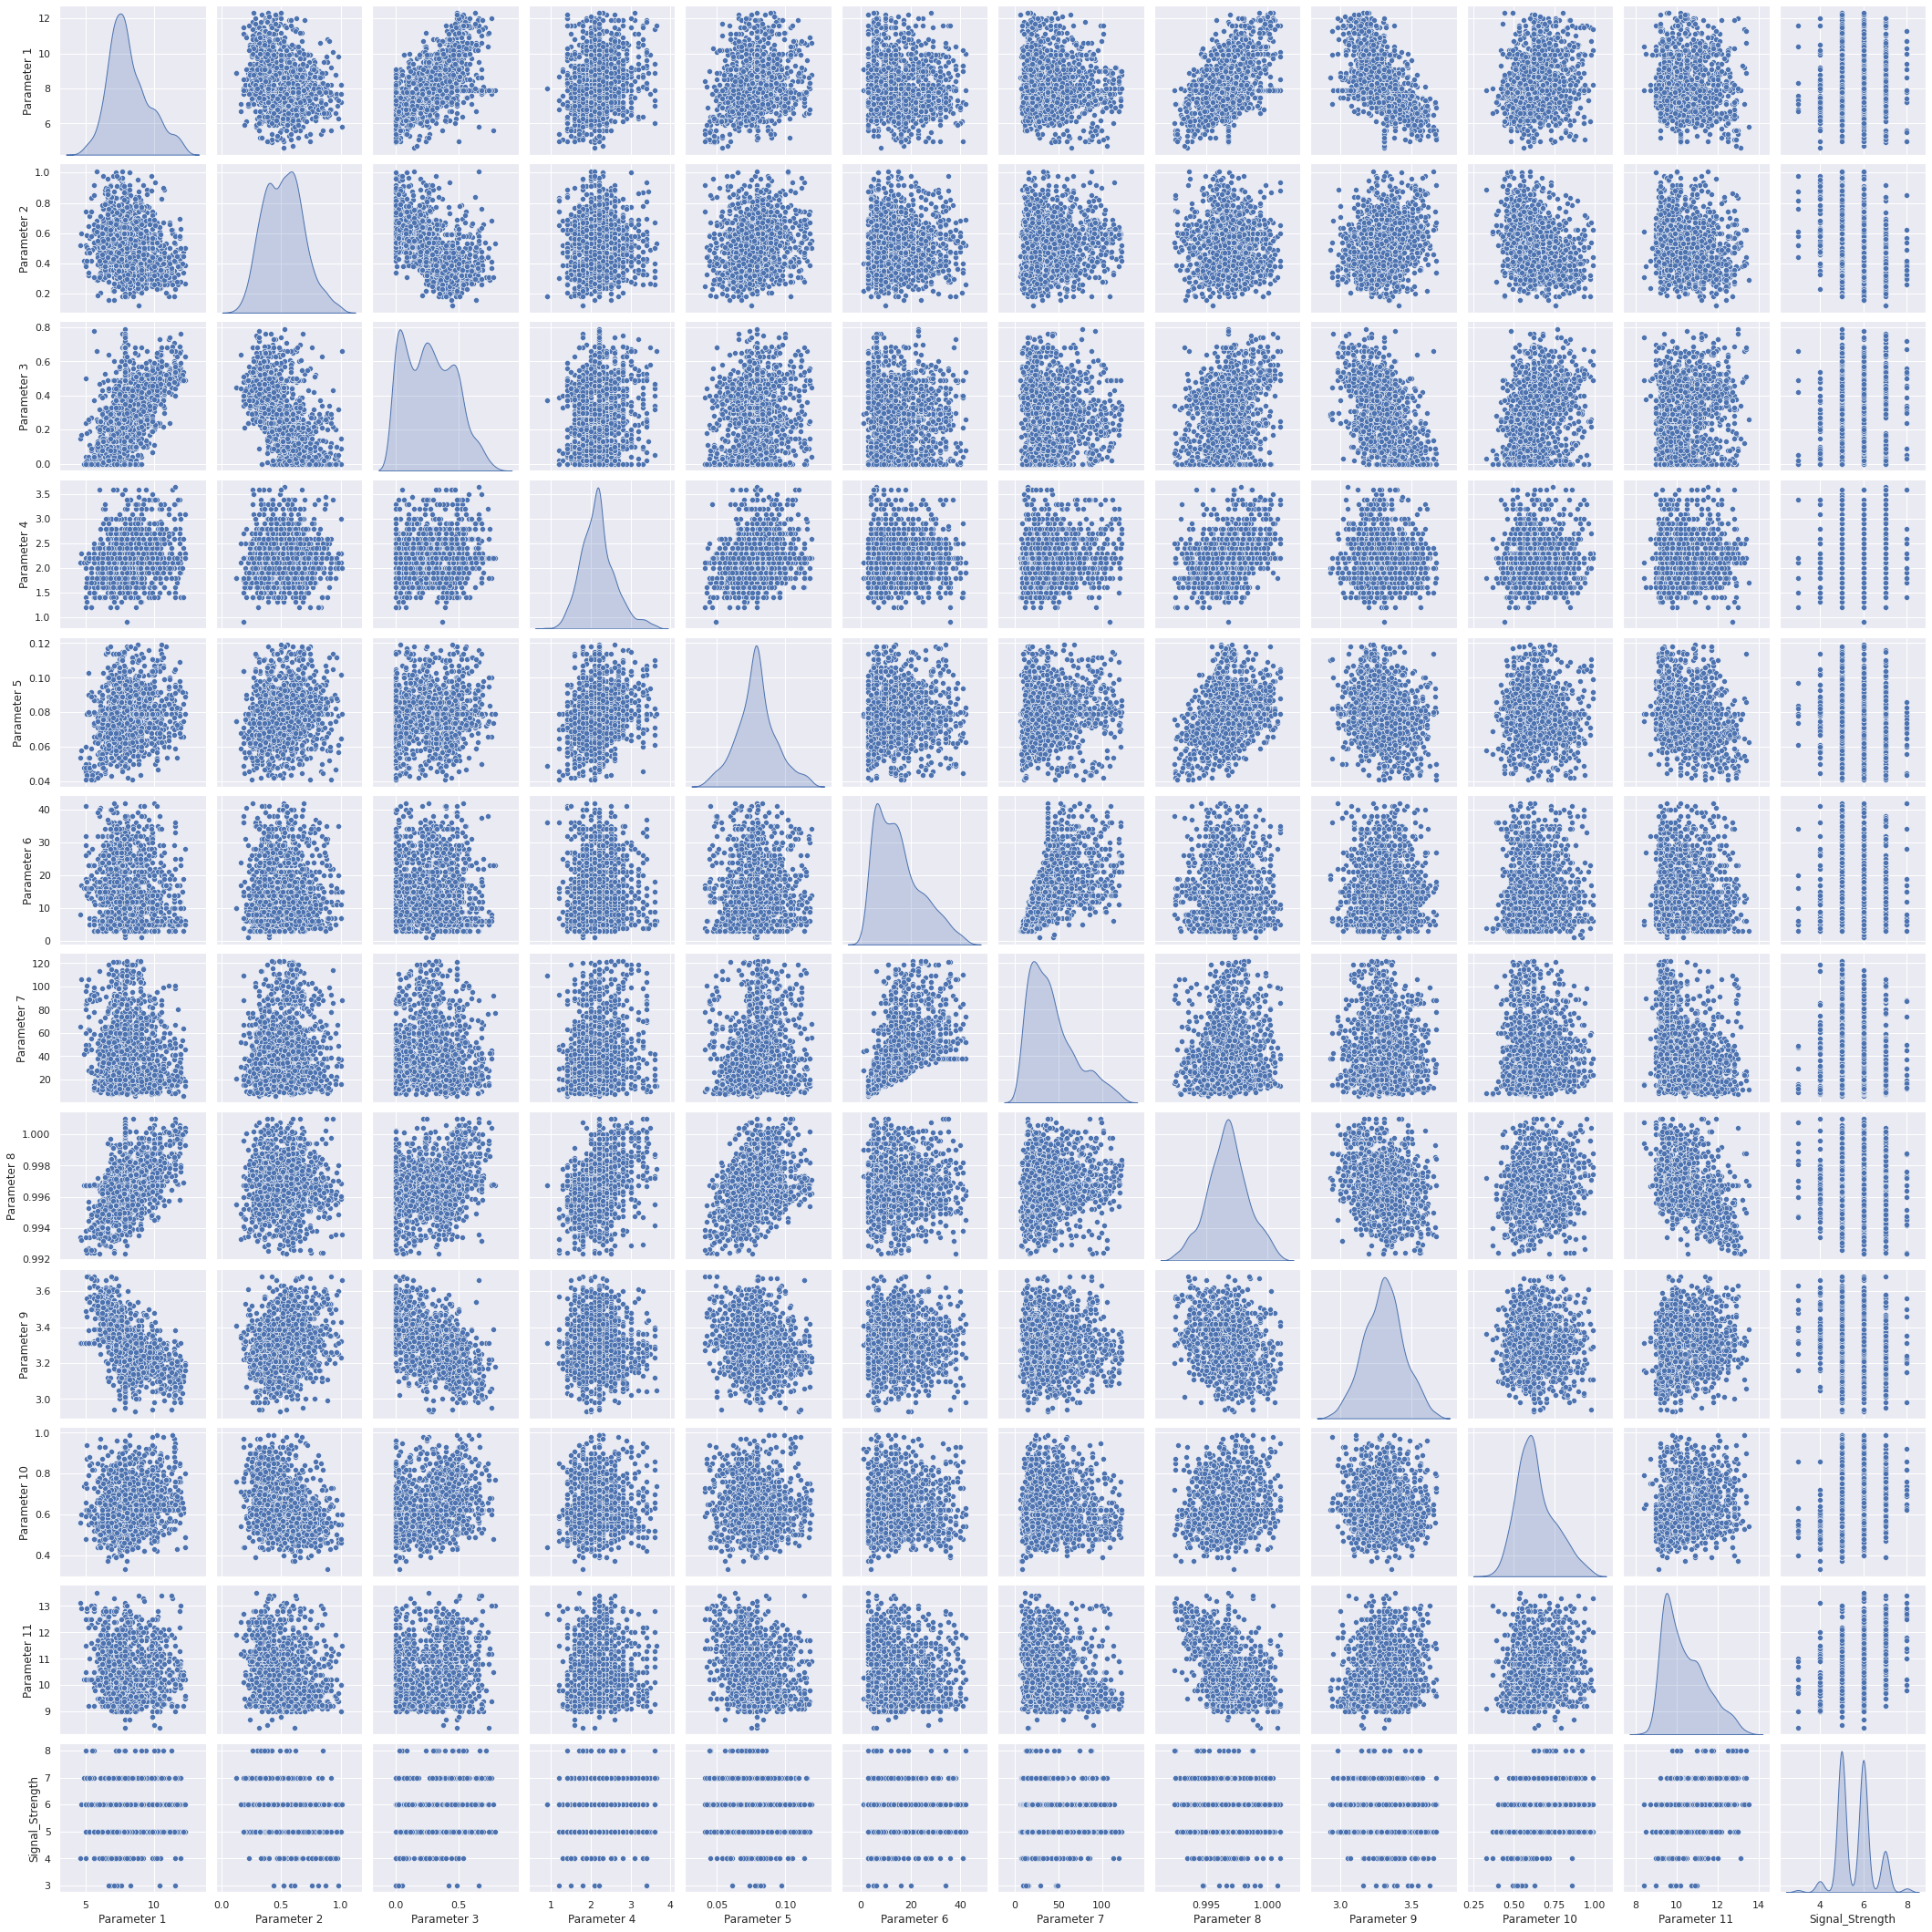

In [10]:
sns.pairplot(signal,diag_kind='kde')
plt.show();

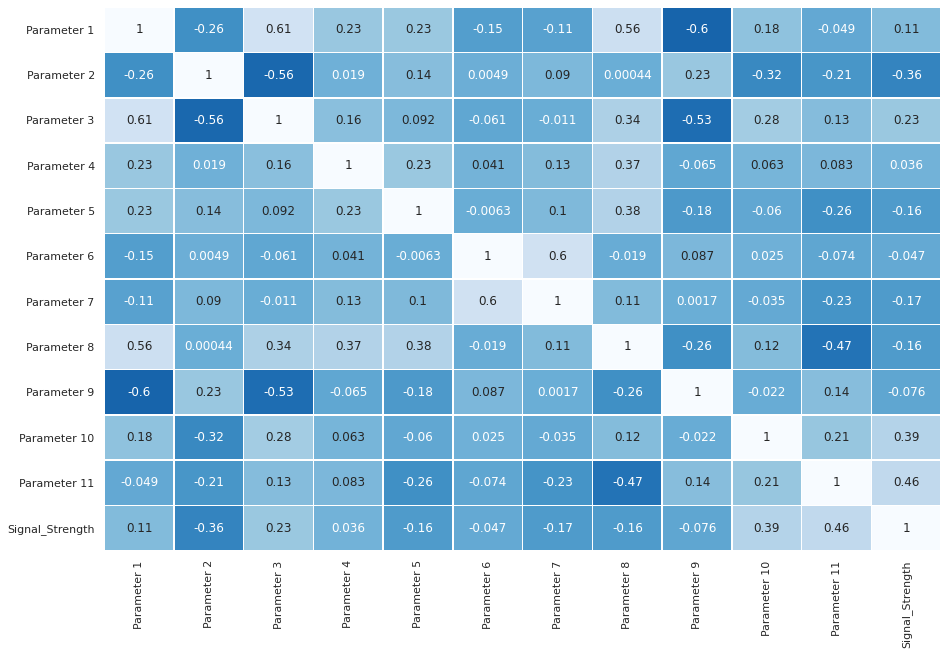

In [11]:
## Plotting the correlation matrix on a heatmap
plt.figure(figsize=[15,10])
sns.heatmap(signal.corr(), 
            cmap='Blues_r',
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False
           )
plt.show();

### Scaling the data and Creating Model

In [12]:
## Splitting the dataset into input variables and target variable 
## Taking Signal_Strength as target variable
X_val=signal.drop(columns='Signal_Strength')
Y_val=signal['Signal_Strength'].values
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X_val)
y1 = Y_val.copy()
y1 = y1.reshape(-1,1)
y1 = scaler.fit_transform(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state = 10)

In [13]:
def regr_model(iter, lr, Lambda, verb=True):

    ## set hyperparameters
    iterations = iter
    learning_rate = lr
    hidden_nodes = 30
    output_nodes = 1

    # Model creation
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    
    ## Adding optimiser
    adam = optimizers.Adam(lr=learning_rate)

    # Compiling model
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=50, validation_split = 0.2)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score, model

### Finding optimal value of learning rate and Lambda

In [14]:
for k in range(1,16):
    lr = math.pow(10, np.random.uniform(-4.0,-2.0))
    Lambda = math.pow(10, np.random.uniform(-7,-4))
    best_mse = regr_model(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_mse: {2}, lr: {3}, Lambda: {4}\n".format(k, 15, best_mse, lr, Lambda))

Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 0.0805 - mse: 0.0805 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0192 - mse: 0.0191 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0230 - val_mse: 0.0229
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0186 - 

In [15]:
lr = 4.583e-3
Lambda = 7.504e-6
score, model = regr_model(200, lr, Lambda)

Epoch 1/200
18/18 [==============================] - 1s 14ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 3/200
18/18 [==============================] - 0s 14ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0200 - val_mse: 0.0199
Epoch 8/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0178 -

### Model Evaluation

In [16]:
print('Training score is:',score)
print('Testing score is:')
model.evaluate(X_test,y_test)

Training score is: [0.010812666267156601, 0.010792993009090424]
Testing score is:
15/15 [==============================] - 0s 2ms/step - loss: 0.0194 - mse: 0.0193


[0.01936950720846653, 0.019349833950400352]

The mse in test set is approx 1.93 which is approximate to the train mse of 1.08. The model is fit





### Saving the Model

In [17]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/nn_regressor_model.h5')

In [18]:
# Recreate the exact same model, including its weights and the optimizer
nn_regressor = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/nn_regressor_model.h5')

# Show the model architecture
nn_regressor.summary()

## validate if its the same model with mse
nn_regressor.evaluate(X_test,y_test)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_61 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 31        
Total params: 2,251
Trainable params: 2,251
Non-trainable params: 0
_________________________________________________________________
15/15 [==============================] - 0s 1ms/step - loss: 0.0194 - mse: 0.0193


[0.01936950720846653, 0.019349833950400352]

# Part TWO

### Import and load data

In [19]:
# importing the file into a dataframe and displaying the rows
signal = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Signal.csv')
signal.head()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

## Basic EDA

In [20]:
#checking for null/NA values and printing info
print("Count of null values=",signal.isna().sum().sum())
print(signal.info());

Count of null values= 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [21]:
### Adding the central values,skewness, standard deviation and quartiles in a dataframe
describedf=signal.describe().T
describedf['range']=describedf['max']-describedf['min']
describedf.drop(columns='count', inplace=True)
describedf['median']=signal.median()
describedf['skewness']=signal.skew()
describedf

mean        std      min  ...      range    median  skewness
Parameter 1       8.319637   1.741096  4.60000  ...   11.30000   7.90000  0.982751
Parameter 2       0.527821   0.179060  0.12000  ...    1.46000   0.52000  0.671593
Parameter 3       0.270976   0.194801  0.00000  ...    1.00000   0.26000  0.318337
Parameter 4       2.538806   1.409928  0.90000  ...   14.60000   2.20000  4.540655
Parameter 5       0.087467   0.047065  0.01200  ...    0.59900   0.07900  5.680347
Parameter 6      15.874922  10.460157  1.00000  ...   71.00000  14.00000  1.250567
Parameter 7      46.467792  32.895324  6.00000  ...  283.00000  38.00000  1.515531
Parameter 8       0.996747   0.001887  0.99007  ...    0.01362   0.99675  0.071288
Parameter 9       3.311113   0.154386  2.74000  ...    1.27000   3.31000  0.193683
Parameter 10      0.658149   0.169507  0.33000  ...    1.67000   0.62000  2.428672
Parameter 11     10.422983   1.065668  8.40000  ...    6.50000  10.20000  0.860829
Signal_Strength   5.636023   0.807569  3.00000  ...    5.00000   6.00000  0.217802

[12 rows x 10 columns]

In [22]:
## replacing outliers with median values
for j in signal.columns[:-1]:
    Q1 = signal[j].quantile(0.25)
    Q3 = signal[j].quantile(0.75)
    IQR = Q3 - Q1
    signal.loc[(signal[j] < (Q1 - (1.5*IQR))) | (signal[j] > (Q3 + (1.5*IQR))),j] = signal[j].median()

## Data analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64


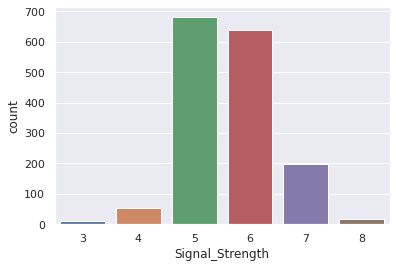

In [23]:
# distribution plot for categorical variable
print(signal.Signal_Strength.value_counts())
sns.countplot(x=signal.Signal_Strength);

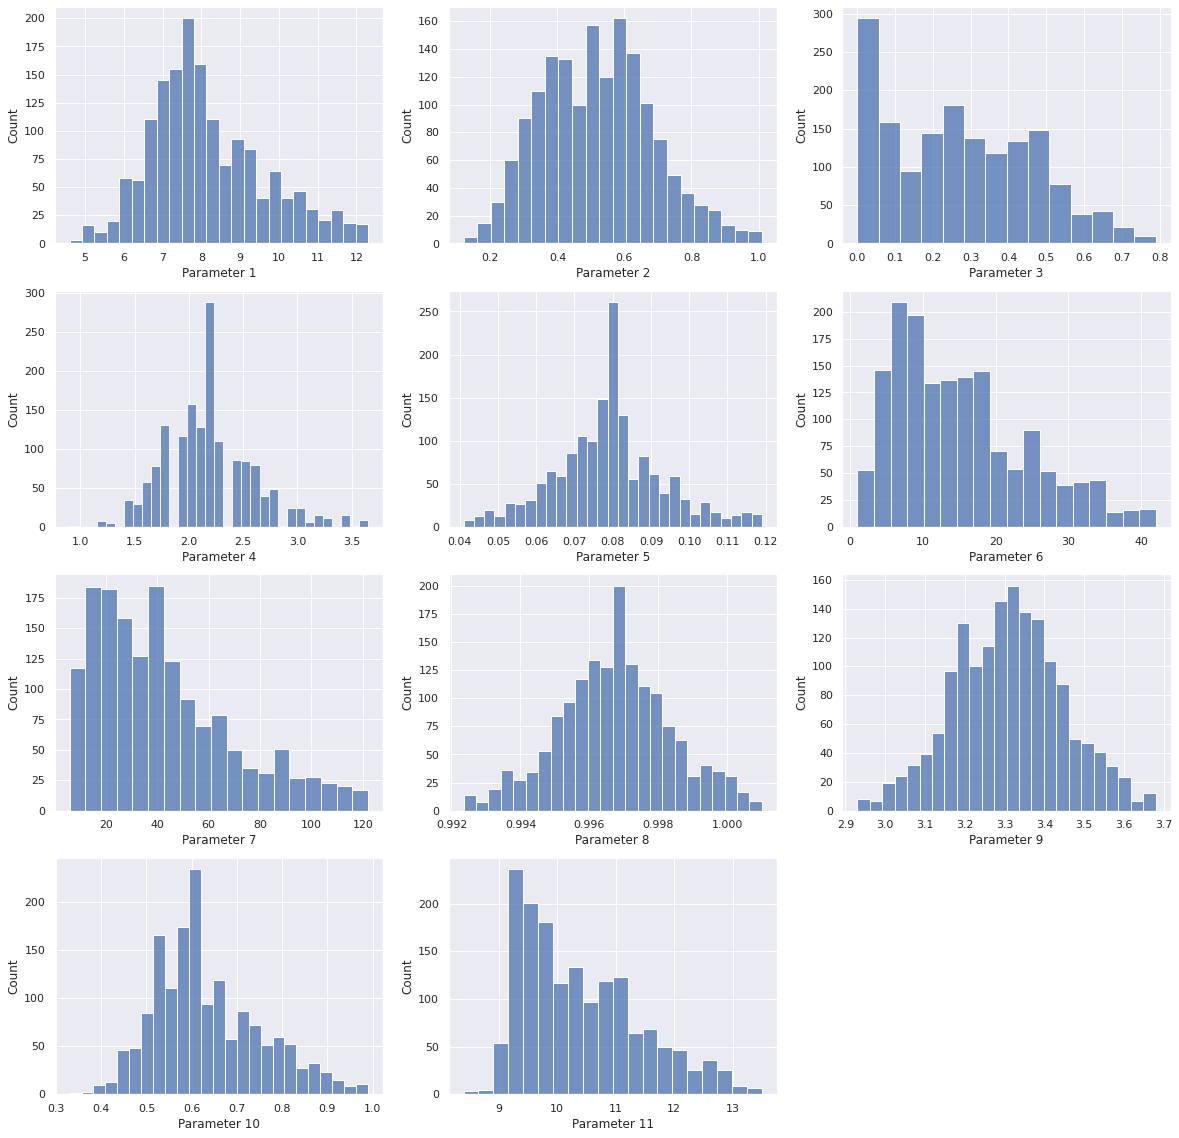

In [24]:
#Univariate analysis of predictor columns
fig, axs = plt.subplots(nrows=4, ncols = 3, figsize=(20,20))
axs = axs.flatten()
for i in range(0,len(signal.columns)-1):
    sns.histplot(signal.iloc[:,i],ax=axs[i],kde=False)
fig.delaxes(axs[11])
plt.show()

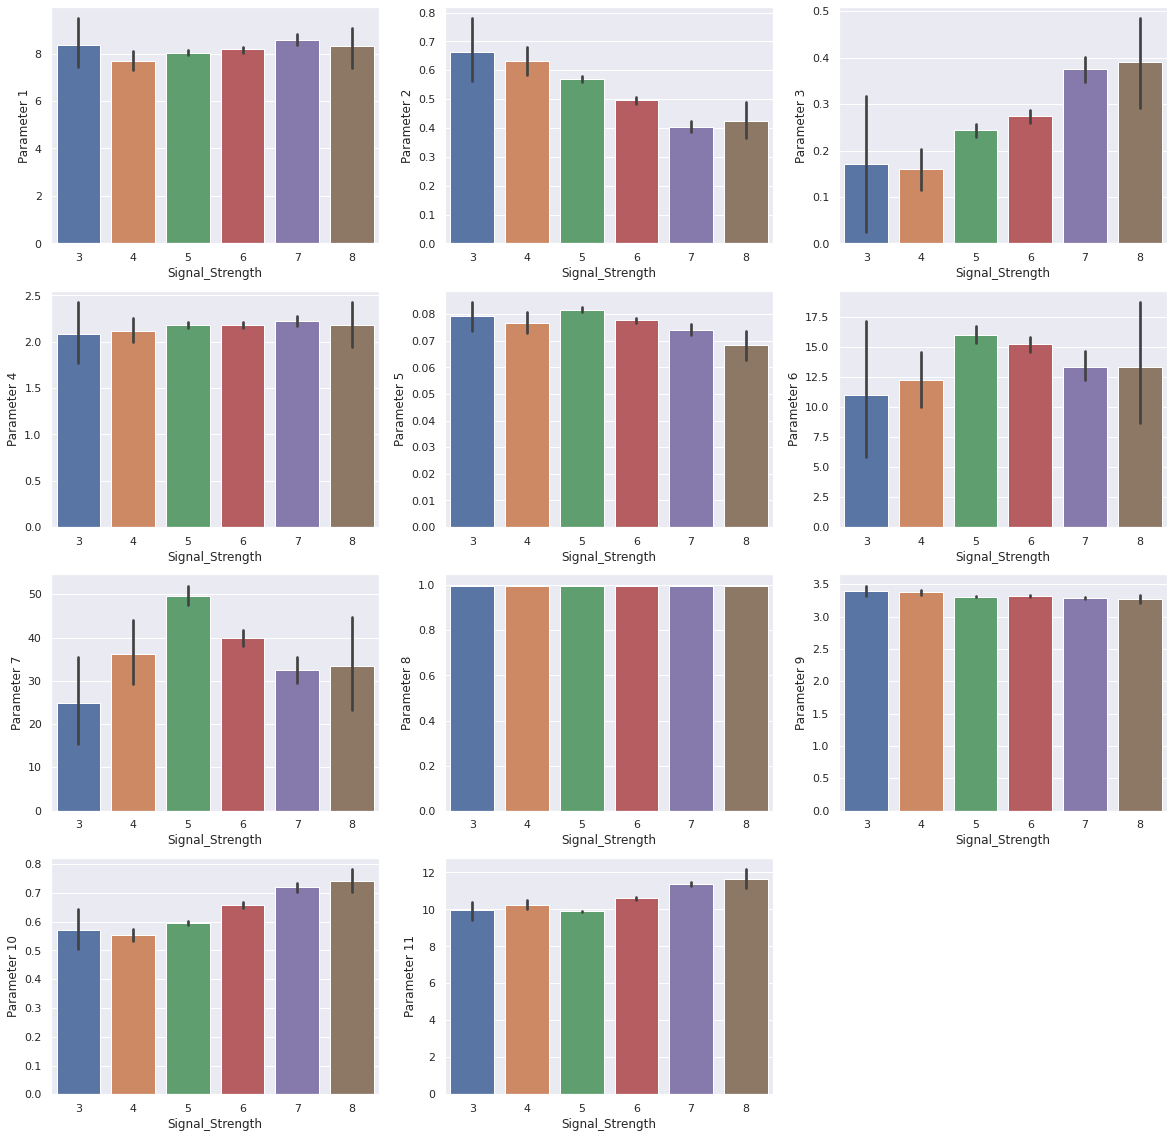

In [25]:
#plotting parameters vs Signal_Strength
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize=(20,20))
axs = axs.flatten()
for i in range(0,len(signal.columns)-1):
    sns.barplot(x=signal['Signal_Strength'],y=signal.iloc[:,i],ax=axs[i])
fig.delaxes(axs[11])
plt.show()

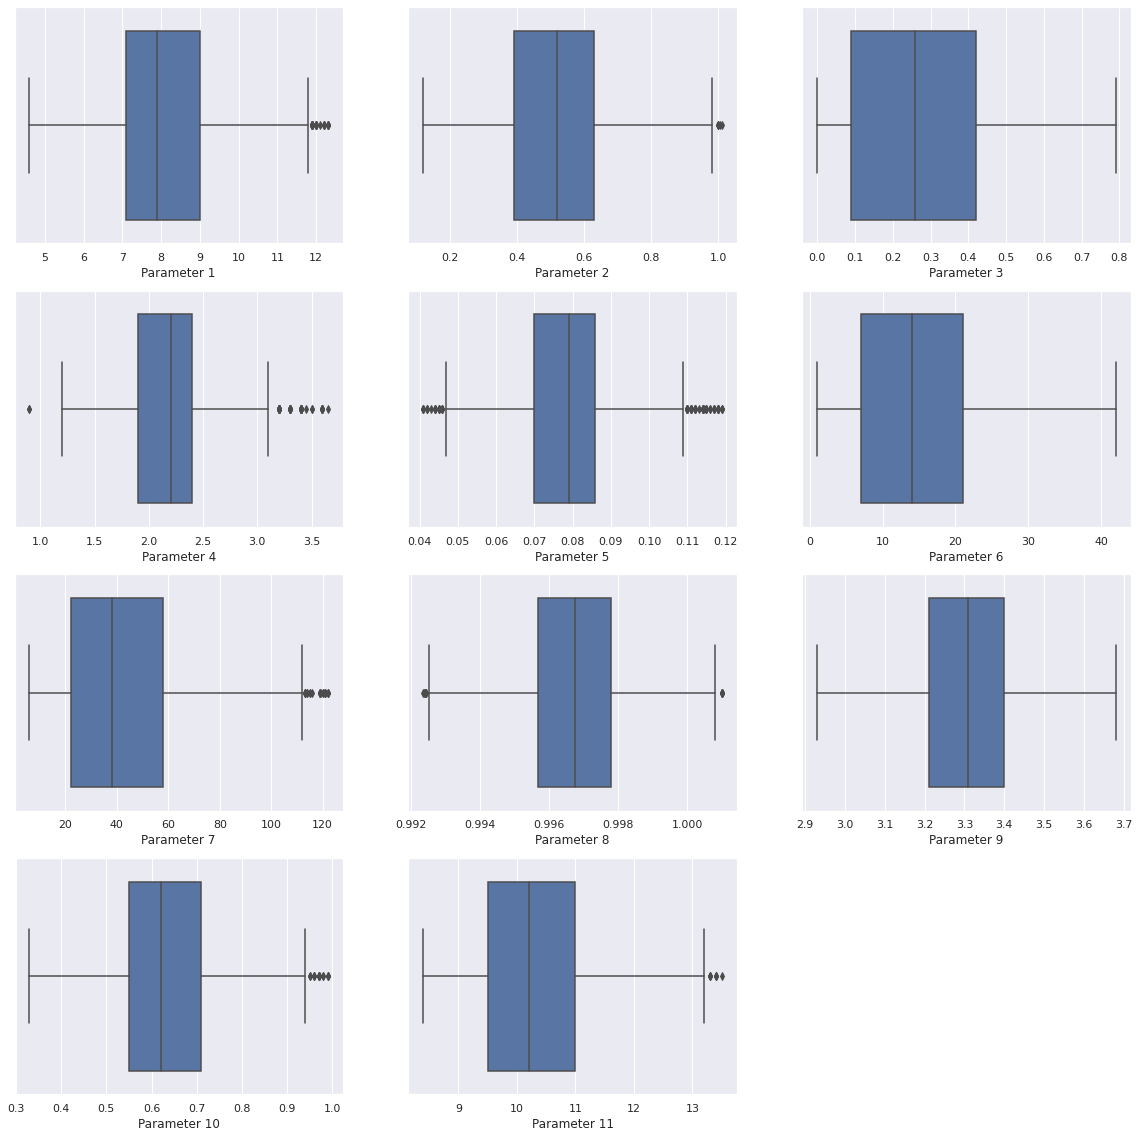

In [ ]:
#Boxplots for outliers and central values
fig, axs = plt.subplots(nrows=4, ncols = 3, figsize=(20,20))
axs = axs.flatten()
for i in range(0,len(signal.columns)-1):
    sns.boxplot(x=signal.iloc[:,i],ax=axs[i]);
fig.delaxes(axs[11])
plt.show()

## Data Scaling ad Model creation

In [28]:
X_val=signal.drop(columns='Signal_Strength')
Y_val=signal['Signal_Strength'].values
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X_val)
y2 = tf.keras.utils.to_categorical(Y_val)
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.3,random_state = 10)

In [42]:
### Defining two models, with adam and sgd optimisers
def classifier_model_adam(iter, lr, verb=True):

    ## set hyperparameters
    iterations = iter
    learning_rate = lr
    hidden_nodes = 30
    output_nodes = 9

    # Model creation
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim=11, activation='relu',kernel_initializer='uniform'))
    model.add(Dense(hidden_nodes, activation='relu',kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(output_nodes, activation = 'softmax',kernel_initializer='uniform'))
    
    ## Adding optimiser
    adam = optimizers.Adam(lr=learning_rate)

    # Compiling model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=64, validation_split = 0.2)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score, model

def classifier_model_sgd(iter, lr, verb=True):

    ## set hyperparameters
    iterations = iter
    learning_rate = lr
    hidden_nodes = 30
    output_nodes = 9

    # Model creation
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim=11, activation='relu',kernel_initializer='uniform'))
    model.add(Dense(hidden_nodes, activation='relu',kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(output_nodes, activation = 'softmax',kernel_initializer='uniform'))
    
    ## Adding optimiser
    sgd = optimizers.RMSprop(lr=learning_rate)

    # Compiling model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=64, validation_split = 0.2)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score, model



## Finding optimal value of learning rate

In [33]:
for k in range(1,16):
    lr = math.pow(10, np.random.uniform(-4.0,-2.0))
    best_acc = classifier_model_adam(100, lr, False)
    print("Try {0}/{1}: Best_acc: {2}, lr: {3}\n".format(k, 15, best_acc, lr))


Epoch 1/100
14/14 [==============================] - 1s 21ms/step - loss: 2.1449 - accuracy: 0.3082 - val_loss: 2.0986 - val_accuracy: 0.3795
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 1.7273 - accuracy: 0.5367 - val_loss: 1.8412 - val_accuracy: 0.4777
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 1.2318 - accuracy: 0.5438 - val_loss: 1.5759 - val_accuracy: 0.5446
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0647 - accuracy: 0.5831 - val_loss: 1.4306 - val_accuracy: 0.5982
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0084 - accuracy: 0.5879 - val_loss: 1.3158 - val_accuracy: 0.5893
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0194 - accuracy: 0.5680 - val_loss: 1.2364 - val_accuracy: 0.5848
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9706 - accuracy: 0.6083 - val_loss: 1.1970 - val_accuracy: 0.6116
Epoch 8/100


In [34]:
for k in range(1,16):
    lr = math.pow(10, np.random.uniform(-4.0,-2.0))
    best_acc = classifier_model_sgd(100, lr, False)
    print("Try {0}/{1}: Best_acc: {2}, lr: {3}\n".format(k, 15, best_acc, lr))


Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 1.9214 - accuracy: 0.4149 - val_loss: 1.8283 - val_accuracy: 0.4598
Epoch 2/100
14/14 [==============================] - 0s 20ms/step - loss: 1.1591 - accuracy: 0.5518 - val_loss: 1.6401 - val_accuracy: 0.5759
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0128 - accuracy: 0.5809 - val_loss: 1.5283 - val_accuracy: 0.4598
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9928 - accuracy: 0.6007 - val_loss: 1.4134 - val_accuracy: 0.6116
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9421 - accuracy: 0.5971 - val_loss: 1.3122 - val_accuracy: 0.4509
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9750 - accuracy: 0.6122 - val_loss: 1.2899 - val_accuracy: 0.4643
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9377 - accuracy: 0.6067 - val_loss: 1.2053 - val_accuracy: 0.5848
Epoch 8/100

In [43]:
lr = 5.052e-3
score_a, model_a = classifier_model_adam(200, lr)

Epoch 1/200
14/14 [==============================] - 1s 20ms/step - loss: 2.1093 - accuracy: 0.4332 - val_loss: 1.9044 - val_accuracy: 0.4286
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 1.5234 - accuracy: 0.5266 - val_loss: 1.4065 - val_accuracy: 0.4821
Epoch 3/200
14/14 [==============================] - 0s 21ms/step - loss: 1.2239 - accuracy: 0.5471 - val_loss: 1.1669 - val_accuracy: 0.5759
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 1.0661 - accuracy: 0.6004 - val_loss: 1.1209 - val_accuracy: 0.5893
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 1.0055 - accuracy: 0.6055 - val_loss: 1.1242 - val_accuracy: 0.5893
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9825 - accuracy: 0.6082 - val_loss: 1.1065 - val_accuracy: 0.6027
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9715 - accuracy: 0.6089 - val_loss: 1.1184 - val_accuracy: 0.6116
Epoch 8/200

In [44]:
lr = 4.006e-3
score_s, model_s = classifier_model_sgd(200, lr)

Epoch 1/200
14/14 [==============================] - 2s 24ms/step - loss: 2.0331 - accuracy: 0.3916 - val_loss: 1.7949 - val_accuracy: 0.3705
Epoch 2/200
14/14 [==============================] - 0s 8ms/step - loss: 1.3548 - accuracy: 0.5432 - val_loss: 1.4936 - val_accuracy: 0.4420
Epoch 3/200
14/14 [==============================] - 0s 16ms/step - loss: 1.1384 - accuracy: 0.5530 - val_loss: 1.3149 - val_accuracy: 0.4420
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 1.1143 - accuracy: 0.5573 - val_loss: 1.2287 - val_accuracy: 0.5357
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 0.9862 - accuracy: 0.5966 - val_loss: 1.1672 - val_accuracy: 0.5893
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9637 - accuracy: 0.5912 - val_loss: 1.1418 - val_accuracy: 0.5000
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9569 - accuracy: 0.6092 - val_loss: 1.1296 - val_accuracy: 0.5982
Epoch 8/200

## Model Evaluation

In [45]:
print('Training score is:',score_a)
print('Testing score is:')
model_a.evaluate(X_test,y_test)

Training score is: [0.6424349546432495, 0.7676497101783752]
Testing score is:
15/15 [==============================] - 0s 3ms/step - loss: 1.6518 - accuracy: 0.5375


[1.6518242359161377, 0.5375000238418579]

In [46]:
print('Training score is:',score_s)
print('Testing score is:')
model_s.evaluate(X_test,y_test)

Training score is: [0.758598268032074, 0.7050938606262207]
Testing score is:
15/15 [==============================] - 0s 3ms/step - loss: 1.7236 - accuracy: 0.5437


[1.7235615253448486, 0.543749988079071]

The Model Shows high loss ad average accuracy on test data showing overfit. This could be due to low data volume.

## Saving the model

In [47]:
model_s.save('/content/gdrive/MyDrive/Colab Notebooks/nn_classifier_model.h5')

In [48]:
# Recreate the exact same model, including its weights and the optimizer
nn_regressor = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/nn_classifier_model.h5')

# Show the model architecture
nn_regressor.summary()

## validate if its the same model with mse
nn_regressor.evaluate(X_test,y_test)

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 30)                360       
_________________________________________________________________
dense_322 (Dense)            (None, 30)                930       
_________________________________________________________________
batch_normalization_65 (Batc (None, 30)                120       
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_323 (Dense)            (None, 9)                 279       
Total params: 1,689
Trainable params: 1,629
Non-trainable params: 60
_________________________________________________________________
15/15 [==============================] - 0s 1ms/step - loss: 1.7236 - accuracy: 0.5437


[1.7235615253448486, 0.543749988079071]